# Analyze results

In [22]:
import json 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

# Now you can import your module
from utils.src import analysis_functions, dataset

In [23]:
params = dataset.load_config("/home/tachennf/Documents/delta-rad/1D_radiomics/nested_cv_settings.yaml")
folder_path = params['paths']['data_folder_path']
outcome_csv = params['paths']['outcome_csv_file']
results_file = params['paths']['results_file']   
delta_rad_tables = params['paths']['delta_rad_tables']
outcomes_list = params['parameters']['outcomes_list']
feat_sel_algo_list = params['parameters']['feat_sel_algo_list']
pred_algo_list = params['parameters']['pred_algo_list']
nice_tables = ['SIMU', 'F1', 'F3', 'F5', 'Simu_F1', 'Simu_F3', 'Simu_F5', 'F1_F3', 'F1_F5']

results = pd.read_json(results_file)
results_dict = json.load(open(results_file))
print(results_dict.keys())  
print(pred_algo_list)
print(feat_sel_algo_list)

dict_keys(['simu_gtv.csv', 'f1_gtv.csv', 'f3_gtv.csv', 'f5_gtv.csv', 'simu_f1_gtv.csv', 'simu_f3_gtv.csv', 'simu_f5_gtv.csv', 'f1_f3_gtv.csv', 'f1_f5_gtv.csv'])
['RF', 'ADABOOST', 'LOGREGRIDGE', 'PSVM', 'KNN', 'BAGG', 'QDA']
['ANOVA_K_BEST', 'RDM_SEL', 'RF']


# Compare one algo with different metrics and CI

In [24]:
pred_algo = "RF"
feat_sel_algo = "ANOVA_K_BEST"
outcome = "one_year_local_control_status"
inter_res = results['simu_gtv.csv'][feat_sel_algo][pred_algo][outcome]
#for table in delta_rad_tables: 
for nb_features in inter_res.keys():
    print(nb_features, inter_res[nb_features]['features'])
    print("Train AUC: ", np.mean(inter_res[nb_features]['train_metrics']['auc']['values']))
    print(inter_res[nb_features]['test_metrics']['auc'])
    print("Test AUC: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['auc']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['auc']['conf_int']), axis=0)[1]))
    print("Test Brier loss: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['brier_loss']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['brier_loss']['conf_int']), axis=0)[1]))
    print("Test sensitivity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['sensitivity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['sensitivity']['conf_int']), axis=0)[1]))
    print("Test specificity: {} ({}; {})".format(np.mean(inter_res[nb_features]['test_metrics']['specificity']['values']), 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[0], 
        np.mean(np.array(inter_res[nb_features]['test_metrics']['specificity']['conf_int']), axis=0)[1]))
    print('')


1 ['original_glcm_MCC']
Train AUC:  0.6718409997899597
{'values': [0.820236826898591, 0.5720617071696791, 0.48954132721208904, 0.626441132397014, 0.640751430378519], 'conf_int': [[0.638878205128205, 0.9565476190476191], [0.308214285714285, 0.8037706043956041], [0.269724025974026, 0.738465909090909], [0.40369318181818103, 0.8110700757575761], [0.454223484848484, 0.8805208333333331]]}
Test AUC: 0.6298064848111784 (0.4149466366966362; 0.8380750083250084)
Test Brier loss: 0.24341365328139603 (0.20667444710098598; 0.2798667280090228)
Test sensitivity: 0.5181818181818176 (0.5181818181818179; 0.5181818181818179)
Test specificity: 0.61060606060606 (0.6106060606060602; 0.6106060606060602)

2 ['original_glcm_MCC', 'original_shape_Flatness']
Train AUC:  0.7715984036967019
{'values': [0.737231761498305, 0.538194767242561, 0.38038263543517004, 0.810702735173323, 0.6579411238432621], 'conf_int': [[0.538690476190476, 0.9001923076923071], [0.315946969696969, 0.792692307692307], [0.10711580086580001, 0

## Best train AUC
### Display

In [25]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='train_auc', k = 10)
analysis_functions.print_top_results(top_results, metric='train_auc')

Table: simu_gtv.csv
  Mean train_auc: 1.0, Feature Selection Algorithm: RF, Prediction Algorithm: BAGG, Features: ['original_glcm_Idn', 'original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy'], Parameters: {'BAGG__n_estimators': 275}
  Mean train_auc: 0.967, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: KNN, Features: ['original_glcm_MCC'], Parameters: {'KNN__n_neighbors': 1}
  Mean train_auc: 0.933, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: ADABOOST, Features: ['original_glcm_MCC', 'original_shape_Flatness', 'original_shape_Sphericity'], Parameters: {'ADABOOST__n_estimators': 25}

Table: f1_gtv.csv
  Mean train_auc: 1.0, Feature Selection Algorithm: RF, Prediction Algorithm: BAGG, Features: ['original_glcm_Idn', 'original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy'], Parameters: {'BAGG__n_estimators': 125}
  Mean train_auc: 0.939, Feature Selection Algorithm: RF, Prediction Algorithm: KNN, Features: ['original_glcm_Id

### Boxplot

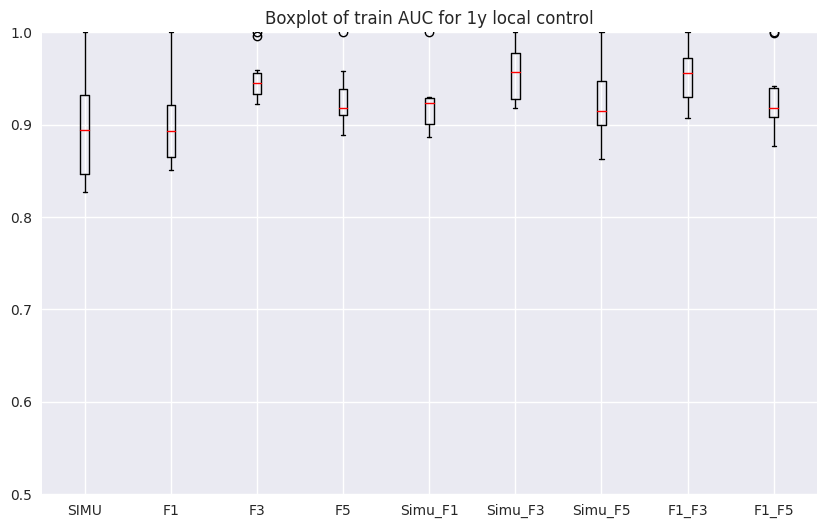

In [26]:
plt.style.use('seaborn-v0_8')
widths = 0.1
medianprops = dict(linestyle='-', linewidth=1, color='red')
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of train AUC for 1y local control')
plt.ylim([0.5, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)


### Scatter plot

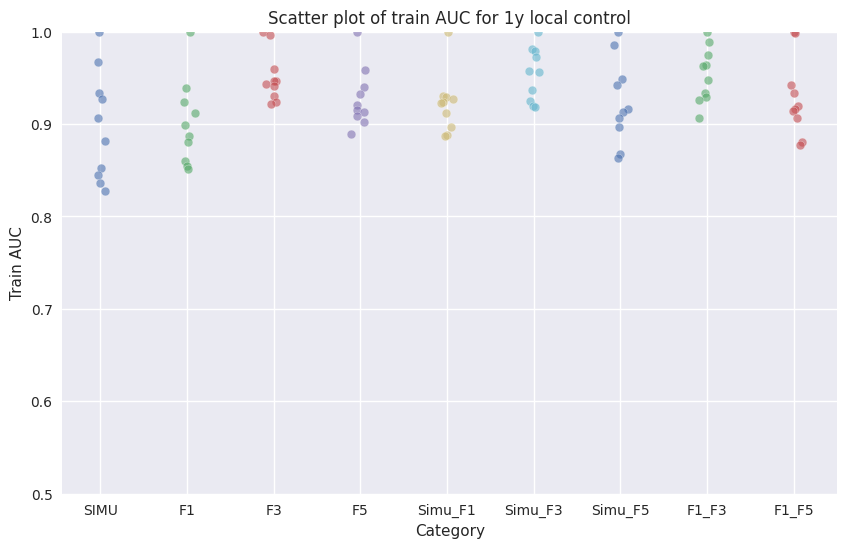

In [27]:
plt.figure(figsize=(10, 6))

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of train AUC for 1y local control')
plt.ylim([0.5, 1])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Train AUC')
plt.show()


## Best train Brier loss
### Display

In [28]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='train_brier_loss', k = 10)
analysis_functions.print_top_results(top_results, metric='train_brier_loss')

Table: simu_gtv.csv
  Mean train_brier_loss: 0.254, Feature Selection Algorithm: RF, Prediction Algorithm: QDA, Features: ['original_glcm_Idn'], Parameters: {'QDA__reg_param': 0.01}
  Mean train_brier_loss: 0.253, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 2}
  Mean train_brier_loss: 0.252, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: QDA, Features: ['original_glcm_Idn', 'original_glcm_JointEntropy'], Parameters: {'QDA__reg_param': 0.09}

Table: f1_gtv.csv
  Mean train_brier_loss: 0.305, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: QDA, Features: ['original_glcm_MCC', 'original_glcm_Imc1', 'original_glcm_Correlation'], Parameters: {'QDA__reg_param': 0.01}
  Mean train_brier_loss: 0.256, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: QDA, Features: ['original_glcm_MCC', 'original_glcm_Imc1'], Parameters: {'QDA__reg_param': 0.01}
  Mean tra

### Boxplot

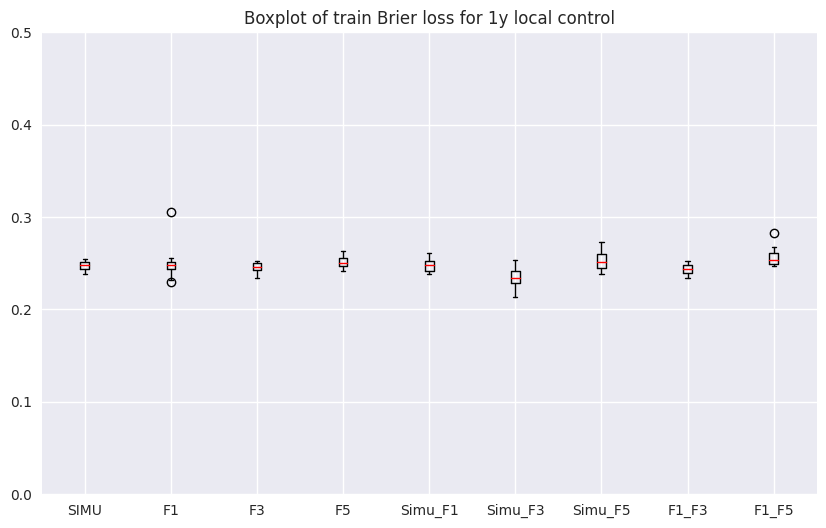

In [29]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of train Brier loss for 1y local control')
plt.ylim([0, 0.5])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

### Scatter plot

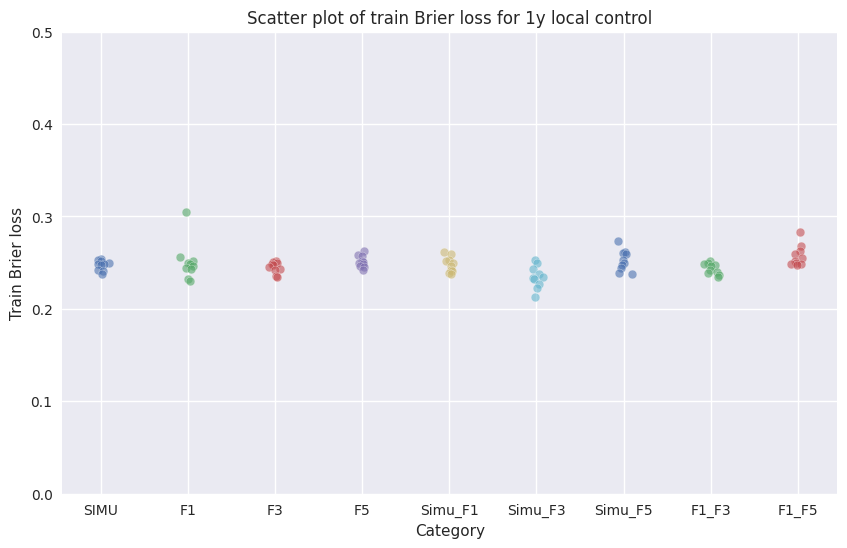

In [30]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of train Brier loss for 1y local control')
plt.ylim([0, 0.5])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Train Brier loss')
plt.show()


## Best test AUC
### Display

In [31]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='test_auc', k = 10)
analysis_functions.print_top_results(top_results, metric='test_auc')

Table: simu_gtv.csv
  Mean test_auc: 0.852, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: BAGG, Features: ['original_glcm_MCC', 'original_shape_Flatness', 'original_shape_Sphericity'], Parameters: {'BAGG__n_estimators': 200}
  Mean test_auc: 0.771, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Features: ['original_glcm_MCC', 'original_shape_Flatness', 'original_shape_Sphericity'], Parameters: {'RF__max_depth': 1, 'RF__n_estimators': 25}
  Mean test_auc: 0.744, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: BAGG, Features: ['original_glcm_MCC'], Parameters: {'BAGG__n_estimators': 200}

Table: f1_gtv.csv
  Mean test_auc: 0.876, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_MCC', 'original_firstorder_Kurtosis', 'original_shape_Maximum2DDiameterRow'], Parameters: {'BAGG__n_estimators': 125}
  Mean test_auc: 0.846, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: PSVM, Featur

### Boxplot

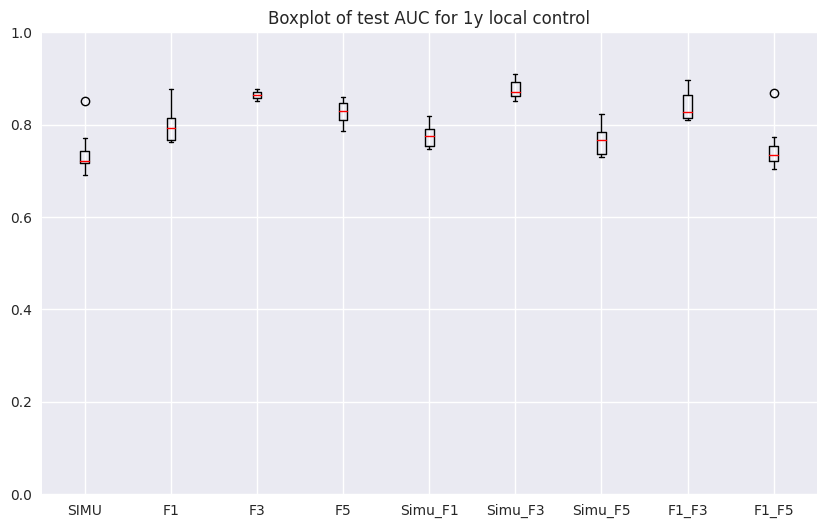

In [32]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test AUC for 1y local control')
plt.ylim([0, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

### Scatter plot

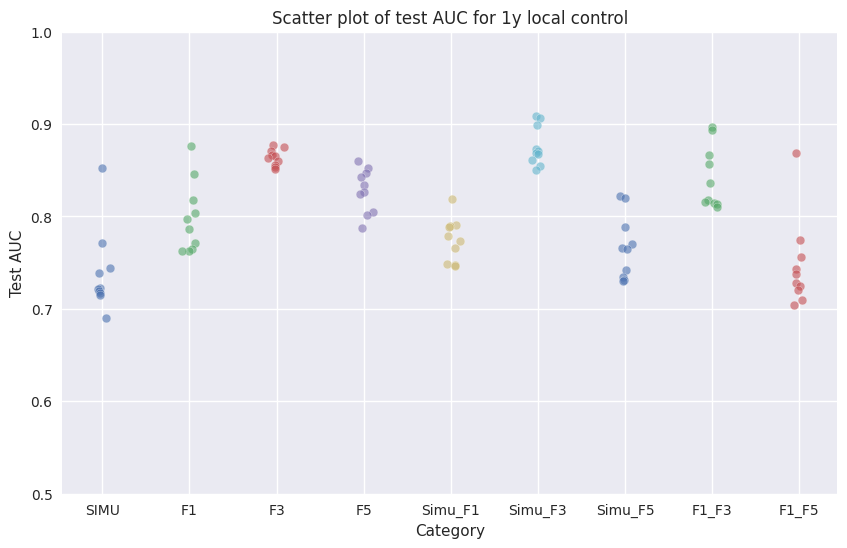

In [33]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of test AUC for 1y local control')
plt.ylim([0.5, 1])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Test AUC')
plt.show()


## Best test brier loss
### Display

In [34]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='test_brier_loss', k = 10)
analysis_functions.print_top_results(top_results, metric='test_brier_loss')

Table: simu_gtv.csv
  Mean test_brier_loss: 0.371, Feature Selection Algorithm: RF, Prediction Algorithm: BAGG, Features: ['original_glcm_Idn'], Parameters: {'BAGG__n_estimators': 200}
  Mean test_brier_loss: 0.367, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_Idn'], Parameters: {'BAGG__n_estimators': 275}
  Mean test_brier_loss: 0.33, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: KNN, Features: ['original_glcm_Idn', 'original_glcm_JointEntropy'], Parameters: {'KNN__n_neighbors': 2}

Table: f1_gtv.csv
  Mean test_brier_loss: 0.318, Feature Selection Algorithm: RF, Prediction Algorithm: BAGG, Features: ['original_glcm_Idn'], Parameters: {'BAGG__n_estimators': 725}
  Mean test_brier_loss: 0.309, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_MCC'], Parameters: {'BAGG__n_estimators': 400}
  Mean test_brier_loss: 0.305, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: B

### Boxplot

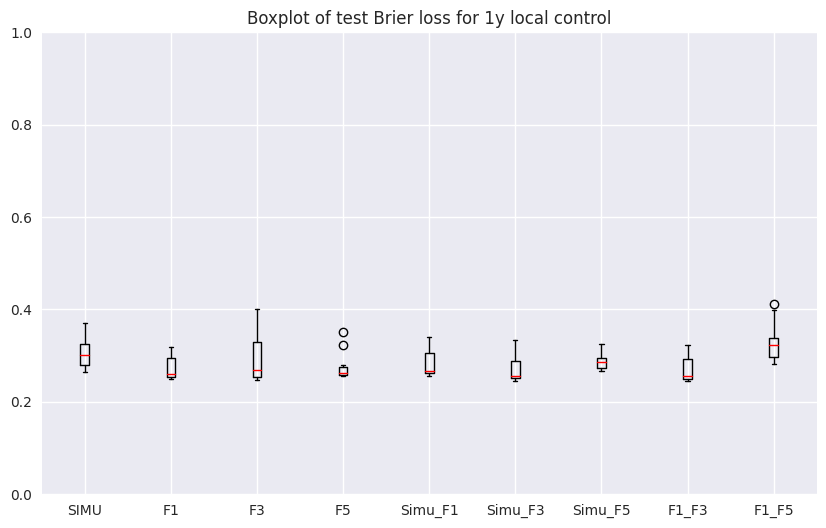

In [35]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test Brier loss for 1y local control')
plt.ylim([0, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

### Scatter plot

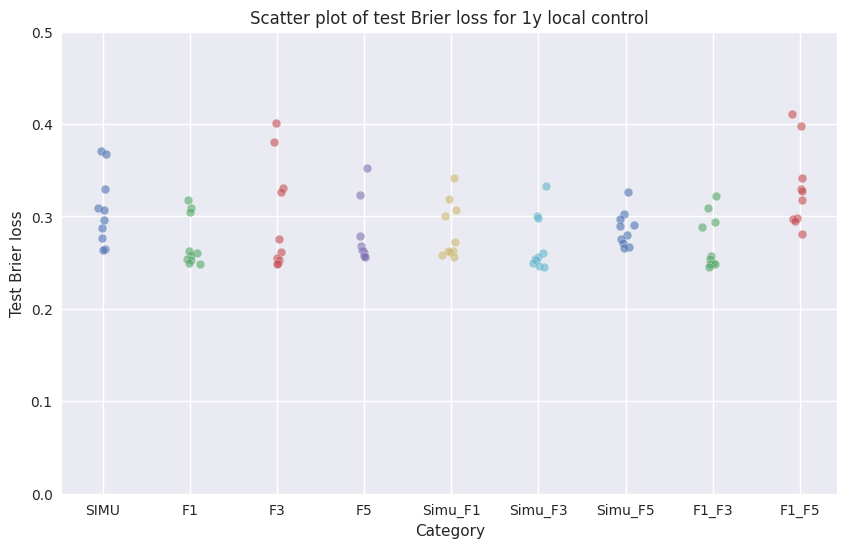

In [36]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of test Brier loss for 1y local control')
plt.ylim([0, 0.5])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Test Brier loss')
plt.show()


## Best sensitivity
### Display

In [37]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='sensitivity', k = 10)
analysis_functions.print_top_results(top_results, metric='sensitivity')

Table: simu_gtv.csv
  Mean sensitivity: 0.909, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn', 'original_glcm_JointEntropy', 'original_glrlm_ShortRunEmphasis'], Parameters: {'PSVM__C': 0.04, 'PSVM__degree': 4}
  Mean sensitivity: 0.895, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn', 'original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy'], Parameters: {'PSVM__C': 0.060000000000000005, 'PSVM__degree': 4}
  Mean sensitivity: 0.874, Feature Selection Algorithm: RF, Prediction Algorithm: LOGREGRIDGE, Features: ['original_glcm_Idn', 'original_shape_Maximum2DDiameterRow', 'original_glcm_JointEntropy'], Parameters: {'LOGREGRIDGE__C': 10.0, 'LOGREGRIDGE__penalty': 'l2'}

Table: f1_gtv.csv
  Mean sensitivity: 0.883, Feature Selection Algorithm: RF, Prediction Algorithm: PSVM, Features: ['original_glcm_Idn'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 2}
  Mean sensitivity: 0.856, Featu

### Boxplot

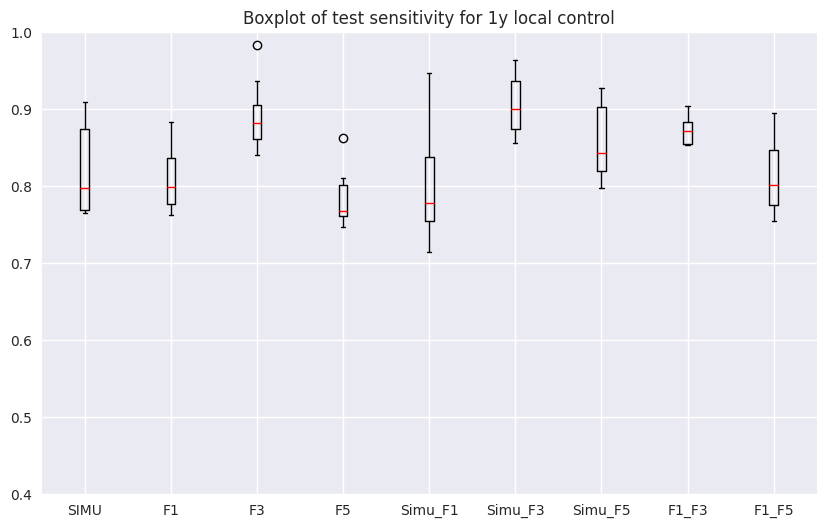

In [38]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test sensitivity for 1y local control')
plt.ylim([0.4, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

### Scatter plot

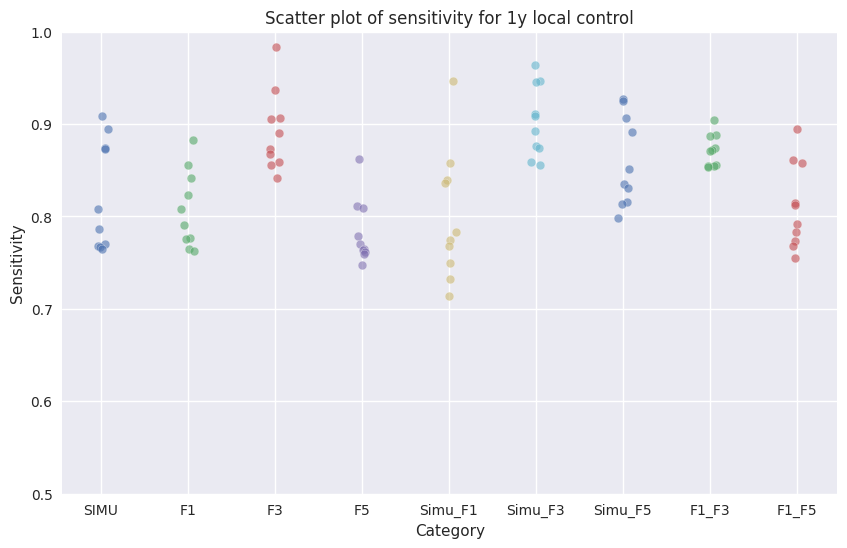

In [39]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of sensitivity for 1y local control')
plt.ylim([0.5, 1])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Sensitivity')
plt.show()


## Best specificity

In [40]:
top_results = analysis_functions.get_top_results(results, delta_rad_tables, feat_sel_algo_list, pred_algo_list, outcome, metric='specificity', k = 10)
analysis_functions.print_top_results(top_results, metric='specificity')

Table: simu_gtv.csv
  Mean specificity: 0.808, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: BAGG, Features: ['original_glcm_MCC', 'original_shape_Flatness', 'original_shape_Sphericity'], Parameters: {'BAGG__n_estimators': 200}
  Mean specificity: 0.773, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: RF, Features: ['original_glcm_MCC', 'original_shape_Flatness', 'original_shape_Sphericity'], Parameters: {'RF__max_depth': 1, 'RF__n_estimators': 25}
  Mean specificity: 0.77, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: PSVM, Features: ['original_glcm_MCC', 'original_shape_Flatness', 'original_shape_Sphericity'], Parameters: {'PSVM__C': 0.01, 'PSVM__degree': 3}

Table: f1_gtv.csv
  Mean specificity: 0.854, Feature Selection Algorithm: RDM_SEL, Prediction Algorithm: BAGG, Features: ['original_glcm_MCC', 'original_firstorder_Kurtosis', 'original_shape_Maximum2DDiameterRow'], Parameters: {'BAGG__n_estimators': 125}
  Mean specificity: 

### Boxplot

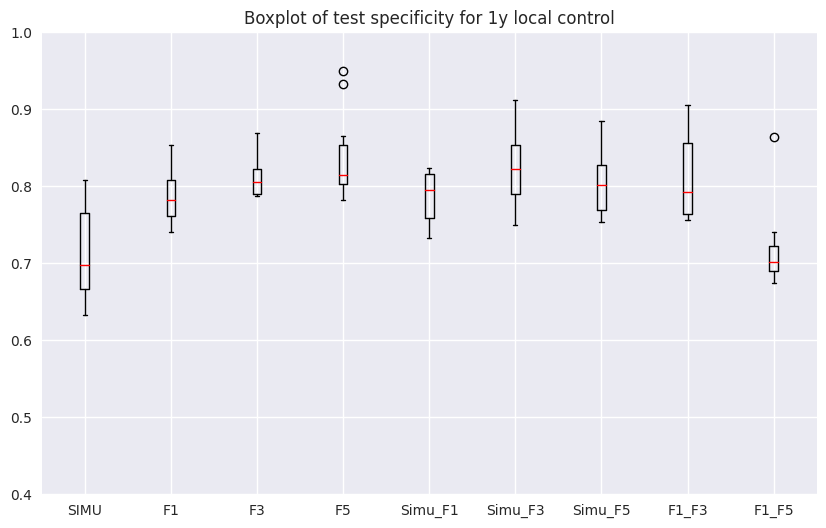

In [41]:
data = analysis_functions.get_top_results_to_plot(top_results)
plt.figure(figsize=(10, 6))
_ = plt.boxplot(data.values(), widths=widths, medianprops=medianprops)
plt.title(f'Boxplot of test specificity for 1y local control')
plt.ylim([0.4, 1])
_ = plt.xticks(range(1, len(delta_rad_tables) + 1), nice_tables)

### Scatter plot

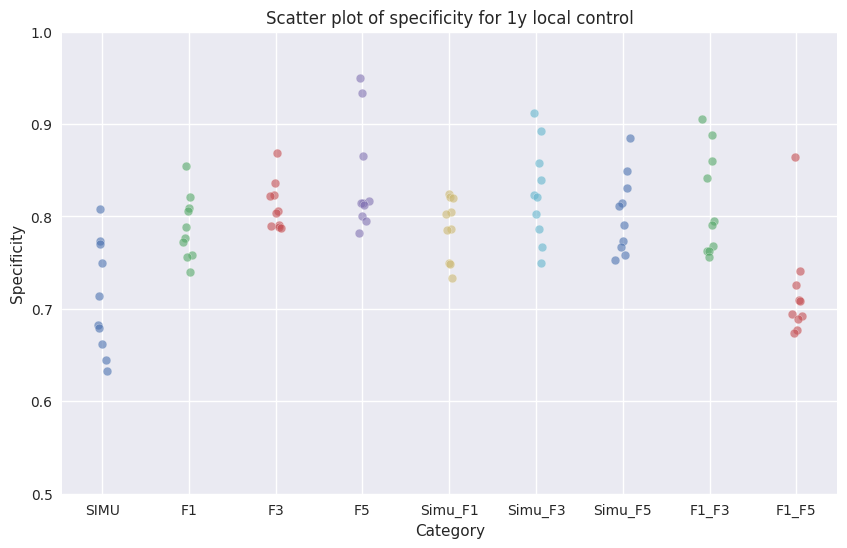

In [42]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))

# Add jitter to the x-axis positions for better visualization
for i, (category, values) in enumerate(data.items()):
    x = np.random.normal(i + 1, 0.04, size=len(values))  # Adding jitter
    plt.scatter(x, values, alpha=0.6, edgecolors='w', s=40)

plt.title(f'Scatter plot of specificity for 1y local control')
plt.ylim([0.5, 1])
plt.xticks(range(1, len(data) + 1), nice_tables)
plt.xlabel('Category')
plt.ylabel('Specificity')
plt.show()


## Best spe & sens

In [43]:
analysis_functions.find_perf_alg(results, delta_rad_tables, [outcome], feat_sel_algo_list, pred_algo_list, metric='sens_spec', threshold=0.8)

Table: f3_gtv.csv, Outcome: one_year_local_control_status, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: ADABOOST, Number of Features: 2, '
'                                           TEST AUC: 0.8477533337387546, Sensitivity: 0.8089743589743588, Specificity: 0.8038461538461537, '
'                                           Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_MCC']
Table: f3_gtv.csv, Outcome: one_year_local_control_status, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: KNN, Number of Features: 2, '
'                                           TEST AUC: 0.8602043205645902, Sensitivity: 0.8230769230769228, Specificity: 0.8358974358974358, '
'                                           Features: ['original_shape_Maximum2DDiameterRow', 'original_glcm_MCC']
Table: f3_gtv.csv, Outcome: one_year_local_control_status, Feature Selection Algorithm: ANOVA_K_BEST, Prediction Algorithm: BAGG, Number of Features: 2, '
'                 